In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                  # For warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

np.random.seed(500)

In [62]:
# uploading dataset
df = pd.read_csv(r"D:\pc\Downloads\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [116]:
df.shape

(205, 26)

In [63]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Data Preprocessing

#### Ordinal Encoding for CarName

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [66]:
Car_name = ['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4', 'mazda glc custom l', 'mazda glc custom',
       'buick electra 225 custom', 'buick century luxus (sw)',
       'buick century', 'buick skyhawk', 'buick opel isuzu deluxe',
       'buick skylark', 'buick century special',
       'buick regal sport coupe (turbo)', 'mercury cougar',
       'mitsubishi mirage', 'mitsubishi lancer', 'mitsubishi outlander',
       'mitsubishi g4', 'mitsubishi mirage g4', 'mitsubishi montero',
       'mitsubishi pajero', 'Nissan versa', 'nissan gt-r', 'nissan rogue',
       'nissan latio', 'nissan titan', 'nissan leaf', 'nissan juke',
       'nissan note', 'nissan clipper', 'nissan nv200', 'nissan dayz',
       'nissan fuga', 'nissan otti', 'nissan teana', 'nissan kicks',
       'peugeot 504', 'peugeot 304', 'peugeot 504 (sw)', 'peugeot 604sl',
       'peugeot 505s turbo diesel', 'plymouth fury iii',
       'plymouth cricket', 'plymouth satellite custom (sw)',
       'plymouth fury gran sedan', 'plymouth valiant', 'plymouth duster',
       'porsche macan', 'porcshce panamera', 'porsche cayenne',
       'porsche boxter', 'renault 12tl', 'renault 5 gtl', 'saab 99e',
       'saab 99le', 'saab 99gle', 'subaru', 'subaru dl', 'subaru brz',
       'subaru baja', 'subaru r1', 'subaru r2', 'subaru trezia',
       'subaru tribeca', 'toyota corona mark ii', 'toyota corona',
       'toyota corolla 1200', 'toyota corona hardtop',
       'toyota corolla 1600 (sw)', 'toyota carina', 'toyota mark ii',
       'toyota corolla', 'toyota corolla liftback',
       'toyota celica gt liftback', 'toyota corolla tercel',
       'toyota corona liftback', 'toyota starlet', 'toyota tercel',
       'toyota cressida', 'toyota celica gt', 'toyouta tercel',
       'vokswagen rabbit', 'volkswagen 1131 deluxe sedan',
       'volkswagen model 111', 'volkswagen type 3', 'volkswagen 411 (sw)',
       'volkswagen super beetle', 'volkswagen dasher', 'vw dasher',
       'vw rabbit', 'volkswagen rabbit', 'volkswagen rabbit custom',
       'volvo 145e (sw)', 'volvo 144ea', 'volvo 244dl', 'volvo 245',
       'volvo 264gl', 'volvo diesel', 'volvo 246']


In [67]:
ordinal = OrdinalEncoder(categories=[Car_name])

In [68]:
encoded_value = ordinal.fit_transform(df[['CarName']])

In [69]:
Car_Name = pd.DataFrame(encoded_value, columns=['CarName'])

In [70]:
Car_Name

,CarName
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
200,140.0
201,141.0
202,142.0
203,146.0


In [71]:
df = df.drop('CarName', axis=1)

In [72]:
df = pd.concat([df, Car_Name], axis=1)
df


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0


### Manual Encoding for fueltype

In [73]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [74]:
# gas == 0 & diesel == 1
df.fueltype = df.fueltype.replace(['gas', 'diesel'], [0, 1])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,1,3,0,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0
1,2,3,0,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,3,1,0,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0
3,4,2,0,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0
4,5,2,0,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0
201,202,-1,0,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0
202,203,-1,0,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0
203,204,-1,1,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0


#### Manual Encoding for aspiration

In [75]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [76]:
# std == 0 & turbo == 1
df.aspiration = df.aspiration.replace(['std', 'turbo'], [0, 1])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,1,3,0,0,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0
1,2,3,0,0,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,3,1,0,0,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0
3,4,2,0,0,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0
4,5,2,0,0,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0
201,202,-1,0,1,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0
202,203,-1,0,0,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0
203,204,-1,1,1,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0


#### Manual Encoding for doornumber

In [77]:
df.doornumber.unique()


array(['two', 'four'], dtype=object)

In [78]:
# two == 0 & four == 1
df.doornumber = df.doornumber.replace(['two', 'four'], [0, 1])
df


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,1,3,0,0,0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0
1,2,3,0,0,0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,3,1,0,0,0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0
3,4,2,0,0,1,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0
4,5,2,0,0,1,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0
201,202,-1,0,1,1,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0
202,203,-1,0,0,1,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0
203,204,-1,1,1,1,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0


#### Ordinal Encoding for carbody

In [79]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [80]:
Car_body = ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']


In [81]:
ordinal = OrdinalEncoder(categories=[Car_body])
encoded_value = ordinal.fit_transform(df[['carbody']])
Car_body = pd.DataFrame(encoded_value, columns=['carbody'])
Car_body

,carbody
0,0.0
1,0.0
2,1.0
3,2.0
4,2.0
...,...
200,2.0
201,2.0
202,2.0
203,2.0


In [82]:
df = df.drop('carbody', axis=1)

In [83]:
df = pd.concat([df, Car_body], axis=1)
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,carbody
0,1,3,0,0,0,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0
1,2,3,0,0,0,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0,0.0
2,3,1,0,0,0,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0,1.0
3,4,2,0,0,1,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0,2.0
4,5,2,0,0,1,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0,2.0
201,202,-1,0,1,1,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0,2.0
202,203,-1,0,0,1,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0,2.0
203,204,-1,1,1,1,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0,2.0


#### Label Encoding for drivewheel

In [84]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [85]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [86]:
df.drivewheel = label.fit_transform(df['drivewheel'])
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,carbody
0,1,3,0,0,0,2,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0
1,2,3,0,0,0,2,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0,0.0
2,3,1,0,0,0,2,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0,1.0
3,4,2,0,0,1,1,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0,2.0
4,5,2,0,0,1,0,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,2,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0,2.0
201,202,-1,0,1,1,2,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0,2.0
202,203,-1,0,0,1,2,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0,2.0
203,204,-1,1,1,1,2,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0,2.0


#### Normal Encoding for enginelocation

In [87]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [88]:
# front == 0 & rear == 1
df.enginelocation = df.enginelocation.replace(['front', 'rear'], [0, 1])
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,carbody
0,1,3,0,0,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0
1,2,3,0,0,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0,0.0
2,3,1,0,0,0,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,2.0,1.0
3,4,2,0,0,1,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,3.0,2.0
4,5,2,0,0,1,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,2,0,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,140.0,2.0
201,202,-1,0,1,1,2,0,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,141.0,2.0
202,203,-1,0,0,1,2,0,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,142.0,2.0
203,204,-1,1,1,1,2,0,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,146.0,2.0


#### Ordinal encoding for enginetype

In [89]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [90]:
Engine_type = ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']

In [91]:
ordinal = OrdinalEncoder(categories=[Engine_type])
encoded_value = ordinal.fit_transform(df[['enginetype']])
Engine_type = pd.DataFrame(encoded_value, columns=['enginetype'])
Engine_type

,enginetype
0,0.0
1,0.0
2,1.0
3,2.0
4,2.0
...,...
200,2.0
201,2.0
202,1.0
203,2.0


In [92]:
df = df.drop('enginetype', axis=1)

In [93]:
df = pd.concat([df, Engine_type], axis=1)
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,carbody,enginetype
0,1,3,0,0,0,2,0,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,0.0,0.0,0.0
1,2,3,0,0,0,2,0,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,1.0,0.0,0.0
2,3,1,0,0,0,2,0,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,2.0,1.0,1.0
3,4,2,0,0,1,1,0,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,3.0,2.0,2.0
4,5,2,0,0,1,0,0,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,2,0,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845.0,140.0,2.0,2.0
201,202,-1,0,1,1,2,0,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045.0,141.0,2.0,2.0
202,203,-1,0,0,1,2,0,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485.0,142.0,2.0,1.0
203,204,-1,1,1,1,2,0,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470.0,146.0,2.0,2.0


#### Ordinal Encoding for cylindernumber

In [94]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [95]:
Cld_number = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

In [96]:
ordinal = OrdinalEncoder(categories=[Cld_number])
encoded_value = ordinal.fit_transform(df[['cylindernumber']])
Cld_number = pd.DataFrame(encoded_value, columns=['cylindernumber'])
Cld_number

,cylindernumber
0,0.0
1,0.0
2,1.0
3,0.0
4,2.0
...,...
200,0.0
201,0.0
202,1.0
203,1.0


In [97]:
df = df.drop('cylindernumber', axis=1)

In [98]:
df = pd.concat([df, Cld_number], axis=1)
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,carbody,enginetype,cylindernumber
0,1,3,0,0,0,2,0,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,0.0,0.0,0.0,0.0
1,2,3,0,0,0,2,0,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,1.0,0.0,0.0,0.0
2,3,1,0,0,0,2,0,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,2.0,1.0,1.0,1.0
3,4,2,0,0,1,1,0,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,3.0,2.0,2.0,0.0
4,5,2,0,0,1,0,0,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,4.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,2,0,109.1,188.8,68.9,...,9.5,114,5400,23,28,16845.0,140.0,2.0,2.0,0.0
201,202,-1,0,1,1,2,0,109.1,188.8,68.8,...,8.7,160,5300,19,25,19045.0,141.0,2.0,2.0,0.0
202,203,-1,0,0,1,2,0,109.1,188.8,68.9,...,8.8,134,5500,18,23,21485.0,142.0,2.0,1.0,1.0
203,204,-1,1,1,1,2,0,109.1,188.8,68.9,...,23.0,106,4800,26,27,22470.0,146.0,2.0,2.0,1.0


#### Ordinal Encoding for fuelsystem

In [99]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [100]:
Fls = ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']

In [101]:
ordinal = OrdinalEncoder(categories=[Fls])
encoded_value = ordinal.fit_transform(df[['fuelsystem']])
Fls = pd.DataFrame(encoded_value, columns=['fuelsystem'])
Fls

,fuelsystem
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
200,0.0
201,0.0
202,0.0
203,6.0


In [102]:
df = df.drop('fuelsystem', axis=1)

In [103]:
df = pd.concat([df, Fls], axis=1)
df

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,CarName,carbody,enginetype,cylindernumber,fuelsystem
0,1,3,0,0,0,2,0,88.6,168.8,64.1,...,111,5000,21,27,13495.0,0.0,0.0,0.0,0.0,0.0
1,2,3,0,0,0,2,0,88.6,168.8,64.1,...,111,5000,21,27,16500.0,1.0,0.0,0.0,0.0,0.0
2,3,1,0,0,0,2,0,94.5,171.2,65.5,...,154,5000,19,26,16500.0,2.0,1.0,1.0,1.0,0.0
3,4,2,0,0,1,1,0,99.8,176.6,66.2,...,102,5500,24,30,13950.0,3.0,2.0,2.0,0.0,0.0
4,5,2,0,0,1,0,0,99.4,176.6,66.4,...,115,5500,18,22,17450.0,4.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,2,0,109.1,188.8,68.9,...,114,5400,23,28,16845.0,140.0,2.0,2.0,0.0,0.0
201,202,-1,0,1,1,2,0,109.1,188.8,68.8,...,160,5300,19,25,19045.0,141.0,2.0,2.0,0.0,0.0
202,203,-1,0,0,1,2,0,109.1,188.8,68.9,...,134,5500,18,23,21485.0,142.0,2.0,1.0,1.0,0.0
203,204,-1,1,1,1,2,0,109.1,188.8,68.9,...,106,4800,26,27,22470.0,146.0,2.0,2.0,1.0,6.0


#### Splitting Data into X and y

In [104]:
X = df.drop(['price'], axis=1)

In [105]:
y = df['price']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [107]:
print("X-Train:", X_train.shape[1])

X-Train: 25


In [122]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Dense(300, input_dim=25, activation='relu'))

    model.add(Dense(100, input_dim=25, activation='relu'))
    
    model.add(Dense(25, input_dim=25, activation='relu'))
    
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [123]:
from keras.wrappers.scikit_learn import KerasRegressor

estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=3, verbose=1)

In [124]:
from keras.models import Sequential
from keras.layers import Dense

history=estimator.fit(X_train,y_train)

Epoch 1/100
48/48 [==============================] - 0s 2ms/step - loss: 106118512.0000
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 58958184.0000
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 49931688.0000
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 41778256.0000
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 36137972.0000
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 33669448.0000
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 28180504.0000
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 26925498.0000
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 25336734.0000
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 24717042.0000
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 23467562.0000
Epoch 12/100
48/48 [====================

48/48 [==============================] - 0s 1ms/step - loss: 11105612.0000
Epoch 95/100
48/48 [==============================] - 0s 1ms/step - loss: 12352704.0000
Epoch 96/100
48/48 [==============================] - 0s 1ms/step - loss: 10234418.0000
Epoch 97/100
48/48 [==============================] - 0s 1ms/step - loss: 11716725.0000
Epoch 98/100
48/48 [==============================] - 0s 1ms/step - loss: 11945289.0000
Epoch 99/100
48/48 [==============================] - 0s 1ms/step - loss: 11315198.0000
Epoch 100/100
48/48 [==============================] - 0s 1ms/step - loss: 11607186.0000


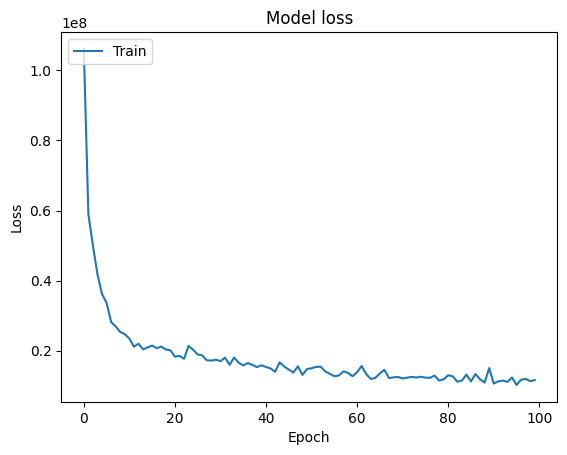

In [125]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [126]:
from sklearn.metrics import accuracy_score

prediction = estimator.predict(X_test)

21/21 [==============================] - 0s 1ms/step


In [127]:
train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [128]:
print("std_error: ", std_error)
print("mean_error: ", mean_error)
print("min_error: ", min_error)
print("max_error: ", max_error)

std_error:  2134.220856822053
mean_error:  1915.038542716734
min_error:  28.6328125
max_error:  10571.373046875


In [129]:
from sklearn.metrics import r2_score
print("r_square score(Test Dataset): ", r2_score(y_test,prediction))

train_prediction = estimator.predict(X_train)
print("r_square score (Train Dataset): ", r2_score(y_train,train_prediction))

r_square score(Test Dataset):  0.8638034311892786
48/48 [==============================] - 0s 1ms/step
r_square score (Train Dataset):  0.8495565545603386
